<a href="https://www.kaggle.com/code/prashantsparhad/dl-5-handwritten-digit-classification-using-ann?scriptVersionId=118527011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

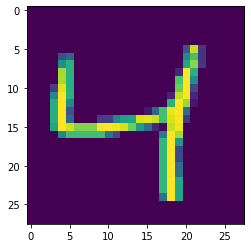

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

2023-02-08 02:23:36.040942: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

2023-02-08 02:23:36.704386: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.9186 - val_loss: 0.1621 - val_accuracy: 0.9531
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1212 - accuracy: 0.9638 - val_loss: 0.1244 - val_accuracy: 0.9627
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0846 - accuracy: 0.9749 - val_loss: 0.0944 - val_accuracy: 0.9717
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.1037 - val_accuracy: 0.9703
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0988 - val_accuracy: 0.9718
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.1000 - val_accuracy: 0.9718
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.1035 - val_accuracy:

In [12]:
y_prob = model.predict(X_test)

In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9735

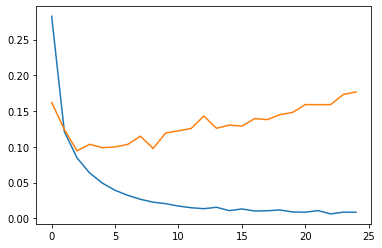

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

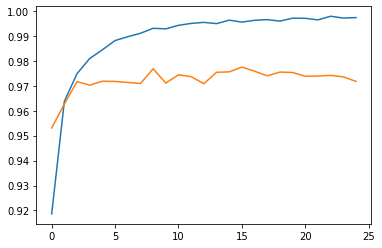

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

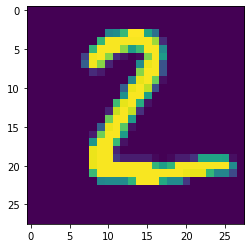

In [17]:
plt.imshow(X_test[1])

In [18]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])